In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./data.csv' , sep= ';')
dataset.head()

,image,species,individual_id,mammal group,categories
0,dfaa26cf13a214.jpg,beluga,19b638e11443,beluga,2
1,6cfa1b234f2a04.jpg,killer_whale,0e461620e872,dolphin,0
2,440b6036e54ce8.jpg,bottlenose_dolpin,c02b7ad6faa0,dolphin,0
3,7fba21051447fd.jpg,beluga,babd014300b7,beluga,2
4,d381ef7ac5d5a3.jpg,beluga,5ac053677ed1,beluga,2


In [3]:
categories = []
for mammal in dataset['mammal group']:
    if mammal == 'dolphin':
        categories.append(0)
    elif mammal == 'whale':
        categories.append(1)
    else:
        categories.append(2)
dataset['categories'] = categories
dataset.head()

,image,species,individual_id,mammal group,categories
0,dfaa26cf13a214.jpg,beluga,19b638e11443,beluga,2
1,6cfa1b234f2a04.jpg,killer_whale,0e461620e872,dolphin,0
2,440b6036e54ce8.jpg,bottlenose_dolpin,c02b7ad6faa0,dolphin,0
3,7fba21051447fd.jpg,beluga,babd014300b7,beluga,2
4,d381ef7ac5d5a3.jpg,beluga,5ac053677ed1,beluga,2


In [4]:
image_list = []
for image in dataset['image']:
    path = './cetaceous_images/' + image
    img = cv2.imread(path)
    image = cv2.resize(img, (32, 32))
    image_list.append(image)
print(len(image_list))

4500


In [5]:
print(image_list[0])

[[[ 99  97  87]
  [ 78  77  67]
  [ 93  93  80]
  ...
  [101  98  88]
  [ 94  95  86]
  [ 84  84  72]]

 [[ 92  90  80]
  [ 95  93  83]
  [105 104  99]
  ...
  [ 90  86  80]
  [ 98  97  88]
  [ 95  93  82]]

 [[ 99  97  87]
  [104 101  93]
  [ 84  84  77]
  ...
  [ 84  83  72]
  [ 97  96  86]
  [105  99  91]]

 ...

 [[ 80  77  69]
  [ 58  57  53]
  [ 79  80  76]
  ...
  [ 61  67  62]
  [ 56  62  62]
  [ 55  64  68]]

 [[ 93  90  82]
  [ 75  77  69]
  [ 58  59  55]
  ...
  [ 90  91  78]
  [ 72  74  66]
  [ 60  64  63]]

 [[ 74  71  67]
  [ 81  85  73]
  [ 92  91  78]
  ...
  [ 88  86  75]
  [ 92  92  79]
  [ 68  69  60]]]


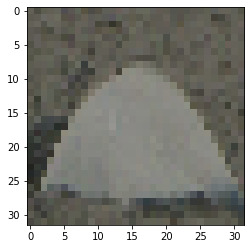

In [6]:
prueba = image_list[0]
plt.imshow(prueba)

In [5]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(dataset['categories'])
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = ((np.array(image_list)) / 255)
y = to_categorical(dataset['categories'])
#y = dataset['categories']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 98)
print(len(X_train))


3600


In [8]:
X_train[0]

array([[[1.        , 0.85490196, 0.76078431],
        [1.        , 0.86666667, 0.79607843],
        [1.        , 0.87843137, 0.81960784],
        ...,
        [1.        , 0.89803922, 0.84313725],
        [1.        , 0.89803922, 0.83137255],
        [1.        , 0.89019608, 0.83137255]],

       [[1.        , 0.8745098 , 0.81176471],
        [0.99607843, 0.87843137, 0.80392157],
        [1.        , 0.88235294, 0.82352941],
        ...,
        [1.        , 0.88235294, 0.80784314],
        [0.99607843, 0.87843137, 0.80392157],
        [1.        , 0.87843137, 0.80392157]],

       [[1.        , 0.8627451 , 0.78431373],
        [0.99215686, 0.86666667, 0.77647059],
        [1.        , 0.8745098 , 0.79607843],
        ...,
        [1.        , 0.89019608, 0.81568627],
        [1.        , 0.88627451, 0.81176471],
        [1.        , 0.88235294, 0.8       ]],

       ...,

       [[0.45490196, 0.4       , 0.31372549],
        [0.65490196, 0.55294118, 0.48627451],
        [0.60392157, 0

In [9]:
print(y_train.shape , X_train.shape)

(3600, 3) (3600, 32, 32, 3)


In [10]:
X_train = X_train
X_test = X_test
print(X_train.shape)
print(X_test.shape)

(3600, 32, 32, 3)
(900, 32, 32, 3)


In [11]:
X_val = X_train[-600:]
y_val = y_train[-600:]
X_train = X_train[:-600]
y_train = y_train[:-600]


In [12]:
print(X_val.shape , X_train.shape)
print(y_val.shape , y_train.shape)
print(X_train[0].shape)

(600, 32, 32, 3) (3000, 32, 32, 3)
(600, 3) (3000, 3)
(32, 32, 3)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', 
               input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax')) 



model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

Epoch 1/20
47/47 [==============================] - 2s 36ms/step - loss: 0.8963 - accuracy: 0.5337 - val_loss: 0.7798 - val_accuracy: 0.5717
Epoch 2/20
47/47 [==============================] - 2s 33ms/step - loss: 0.7066 - accuracy: 0.6437 - val_loss: 0.6800 - val_accuracy: 0.7067
Epoch 3/20
47/47 [==============================] - 2s 33ms/step - loss: 0.6233 - accuracy: 0.7170 - val_loss: 0.5655 - val_accuracy: 0.7483
Epoch 4/20
47/47 [==============================] - 2s 33ms/step - loss: 0.5603 - accuracy: 0.7340 - val_loss: 0.5151 - val_accuracy: 0.7800
Epoch 5/20
47/47 [==============================] - 2s 34ms/step - loss: 0.5316 - accuracy: 0.7647 - val_loss: 0.5047 - val_accuracy: 0.7883
Epoch 6/20
47/47 [==============================] - 2s 34ms/step - loss: 0.4851 - accuracy: 0.7837 - val_loss: 0.4711 - val_accuracy: 0.7900
Epoch 7/20
47/47 [==============================] - 2s 34ms/step - loss: 0.4866 - accuracy: 0.7840 - val_loss: 0.4959 - val_accuracy: 0.7700
Epoch 8/20
47

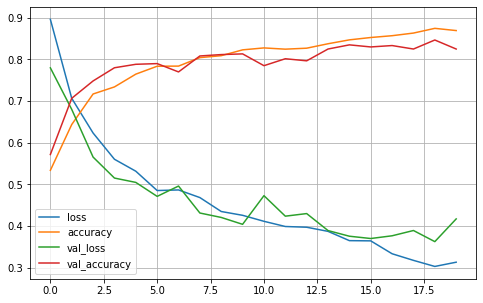

In [16]:
history = model.fit(X_train,
          y_train,
          epochs=20,
          batch_size=64, 
          validation_data = (X_val,y_val))

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [17]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.896259,0.533667,0.779773,0.571667
1,0.706625,0.643667,0.680035,0.706667
2,0.623319,0.717000,0.565501,0.748333
3,0.560282,0.734000,0.515120,0.780000
4,0.531556,0.764667,0.504691,0.788333
5,0.485149,0.783667,0.471112,0.790000
6,0.486589,0.784000,0.495912,0.770000
7,0.468247,0.804333,0.431156,0.808333
8,0.434799,0.809000,0.420525,0.811667
9,0.425650,0.823000,0.404009,0.813333


In [18]:
results = model.evaluate(X_test, y_test)
print("test loss, test accuracy",results)

29/29 [==============================] - 0s 6ms/step - loss: 0.4073 - accuracy: 0.8511
test loss, test accuracy [0.4072558581829071, 0.851111114025116]


In [19]:
loss = list(history_df['loss'])[-1]
train_accuracy = list(history_df['accuracy'])[-1]
val_accuracy = list(history_df['val_accuracy'])[-1]
test_loss = results[0]
test_accuracy = results[1]

In [20]:
results_array = np.array([[loss] , [train_accuracy] , [val_accuracy] , [test_loss] , [test_accuracy]])
results_array

array([[0.31304675],
       [0.86933333],
       [0.82499999],
       [0.40725586],
       [0.85111111]])

In [21]:
results_array = results_array.transpose()
results_array

array([[0.31304675, 0.86933333, 0.82499999, 0.40725586, 0.85111111]])

In [23]:
results_df = pd.DataFrame(results_array , columns= ['train loss' , 'train accuracy' , 'val accuracy' , 'test loss' , 'test accuracy'])
results_df


,train loss,train accuracy,val accuracy,test loss,test accuracy
0,0.313047,0.869333,0.825,0.407256,0.851111
